<a href="https://colab.research.google.com/github/Vimlesh-Maurya/Data-Analyst/blob/main/Walmart_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import geom, expon, norm

In [ ]:
!gdown "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094" -O walmart.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
To: /content/walmart.csv
100% 23.0M/23.0M [00:00<00:00, 101MB/s]


In [ ]:
df = pd.read_csv('/content/walmart.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# 1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset

In [ ]:
# Checking the data types of all the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
# data has 550068 records and 10 features
df.shape

(550068, 10)

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
# There is no null in any of the columns
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

#2. Detect Null values and outliers

In [ ]:
# There is no null in the datset
# lets check the outliers

In [ ]:
# Checking outliers

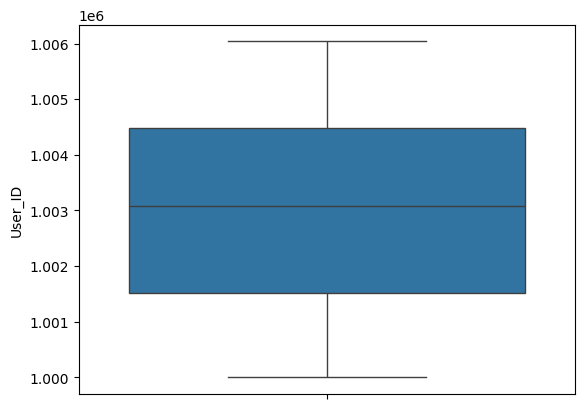

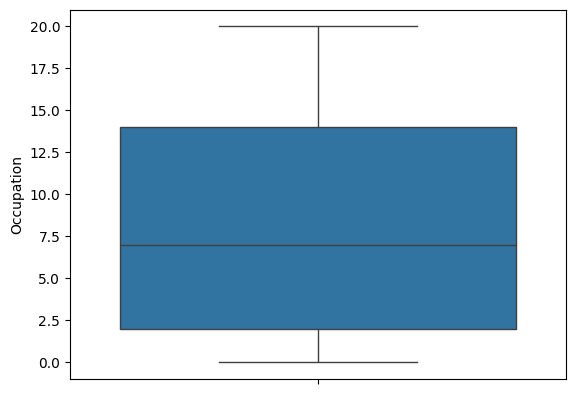

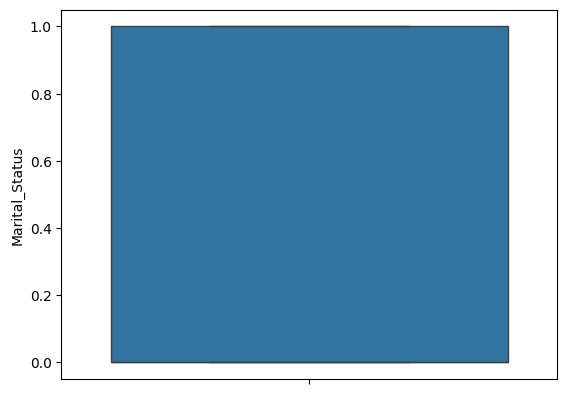

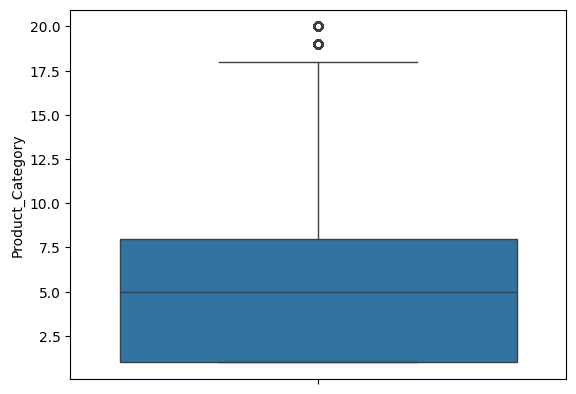

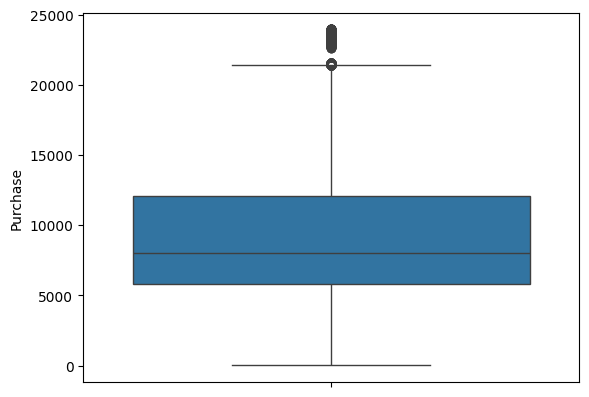

In [ ]:
for col in df.select_dtypes(include = ['int64']):
  sns.boxplot(y = df[col])
  plt.show()

In [ ]:
# It seems there are few outliers in #product Category and purchases
# Lets replace them with np.clip

In [ ]:
# Lets 1st replace Product Category
p_5 = df['Product_Category'].quantile(0.05)
p_95 = df['Product_Category'].quantile(0.95)
df['Product_Category'] = np.clip(df['Product_Category'], p_5, p_95)

In [ ]:
# replace outliers of purchase column
p_5 = df['Purchase'].quantile(0.05)
p_95 = df['Purchase'].quantile(0.95)
df['Purchase'] = np.clip(df['Purchase'], p_5, p_95)

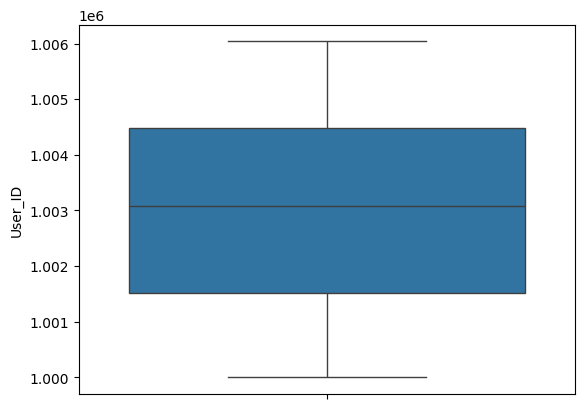

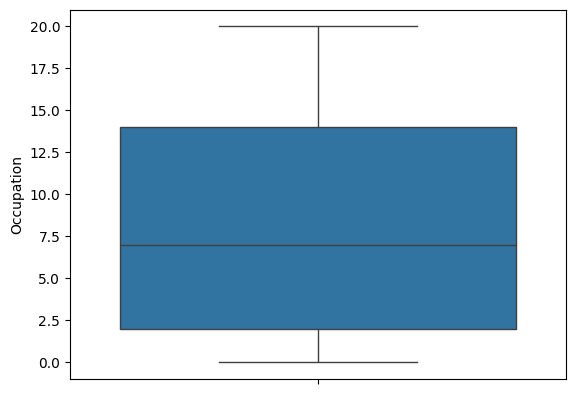

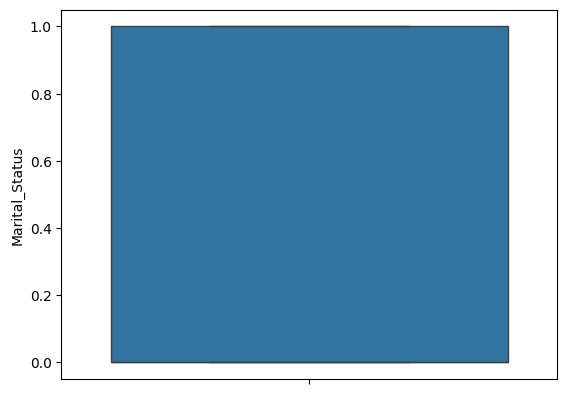

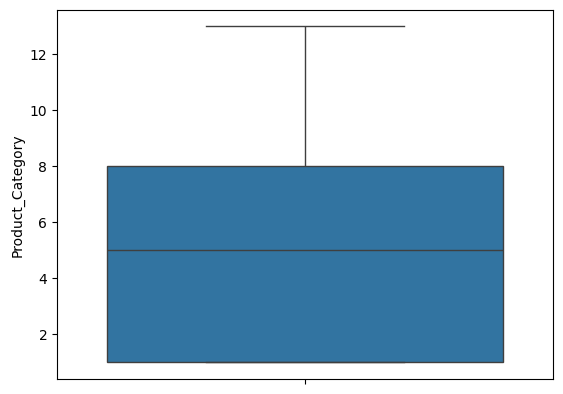

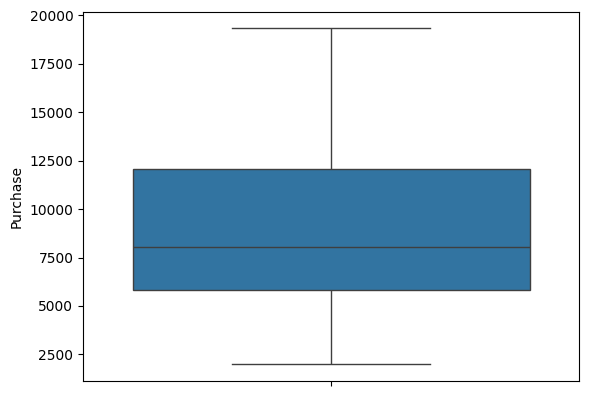

In [ ]:
# Lets re-check if there are any remaining outliers - All outliers gone
for col in df.select_dtypes(include = ['int64']):
  sns.boxplot(df[col])
  plt.show()

#3. Data Exploration

### a. What products are different age groups buying?

In [ ]:
age_product = df.groupby(['Product_ID','Age']).size()
age_product = age_product.reset_index(name = 'Count')
age_product.sort_values(by = 'Count',ascending = False)

,Product_ID,Age,Count
14603,P00265242,26-35,746
5692,P00110742,26-35,634
1433,P00025442,26-35,608
5787,P00112142,26-35,606
3296,P00057642,26-35,597
...,...,...,...
16084,P00290642,36-45,1
4183,P00076642,36-45,1
16083,P00290642,26-35,1
16082,P00290642,18-25,1


In [ ]:
# P00265242, P00025442, P00110742, P00112142, P00057642 are maximum bought products for walmart

<Axes: xlabel='Age'>

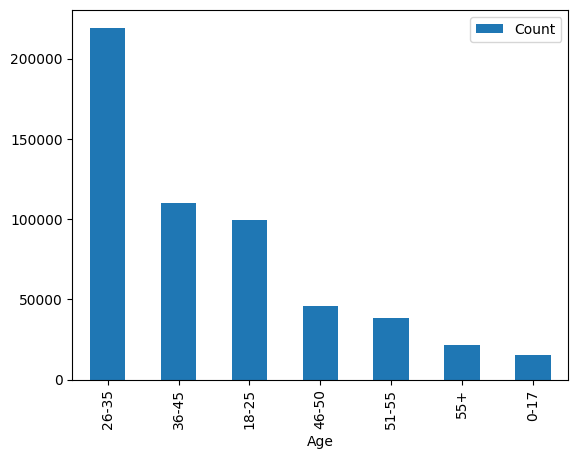

In [ ]:
df_Age = df['Age'].value_counts().reset_index(name = 'Count')
df_Age = df_Age.set_index('Age')
df_Age.plot.bar()

In [ ]:
#26-35 age group people are buying the maximum products, followed by 36-45 age group. 0-17 age group people are buying the minimum

In [ ]:
# Age ='0-17'
# these products P00265242, P00110742, P00025442, P00112142, P00057642 are bought Maximum and
# P00290742, P00363142,P00137342,P00290842,P00080842 are minimum bought by the age group of 26 to 35
Age ='0-17'
print(f'Maximum Product bought by age group: {Age}')
age_product.loc[age_product['Age'] == Age].sort_values(by='Count', ascending = False).head()

Maximum Product bought by age group: 0-17


,Product_ID,Age,Count
14092,P00255842,0-17,65
7709,P00145042,0-17,64
5785,P00112142,0-17,58
1988,P00034742,0-17,56
13316,P00242742,0-17,56


In [ ]:
# Age ='18-25'
# these products P00265242, P00110742, P00025442, P00112142, P00057642 are bought Maximum and
# P00290742, P00363142,P00137342,P00290842,P00080842 are minimum bought by the age group of 26 to 35
Age ='18-25'
print(f'Maximum Product bought by age group: {Age}')
age_product.loc[age_product['Age'] == Age].sort_values(by='Count', ascending = False).head()

Maximum Product bought by age group: 18-25


,Product_ID,Age,Count
14602,P00265242,18-25,389
5786,P00112142,18-25,338
5691,P00110742,18-25,329
13044,P00237542,18-25,298
2679,P00046742,18-25,295


In [ ]:
# Age ='26-35'
# these products P00265242, P00110742, P00025442, P00112142, P00057642 are bought Maximum and
# P00290742, P00363142,P00137342,P00290842,P00080842 are minimum bought by the age group of 26 to 35
Age ='26-35'
print(f'Maximum Product bought by age group: {Age}')
age_product.loc[age_product['Age'] == Age].sort_values(by='Count', ascending = False).head()

Maximum Product bought by age group: 26-35


,Product_ID,Age,Count
14603,P00265242,26-35,746
5692,P00110742,26-35,634
1433,P00025442,26-35,608
5787,P00112142,26-35,606
3296,P00057642,26-35,597


In [ ]:
# Age ='36-45'
# these products P00265242, P00110742, P00025442, P00112142, P00057642 are bought Maximum and
# P00290742, P00363142,P00137342,P00290842,P00080842 are minimum bought by the age group of 26 to 35
Age ='36-45'
print(f'Maximum Product bought by age group: {Age}')
age_product.loc[age_product['Age'] == Age].sort_values(by='Count', ascending = False).head()

Maximum Product bought by age group: 36-45


,Product_ID,Age,Count
1434,P00025442,36-45,356
14604,P00265242,36-45,322
5693,P00110742,36-45,321
5788,P00112142,36-45,301
3297,P00057642,36-45,298


In [ ]:
# Age ='46-50'
# these products P00265242, P00110742, P00025442, P00112142, P00057642 are bought Maximum and
# P00290742, P00363142,P00137342,P00290842,P00080842 are minimum bought by the age group of 26 to 35
Age ='46-50'
print(f'Maximum Product bought by age group: {Age}')
age_product.loc[age_product['Age'] == Age].sort_values(by='Count', ascending = False).head()

Maximum Product bought by age group: 46-50


,Product_ID,Age,Count
14605,P00265242,46-50,138
2682,P00046742,46-50,130
1435,P00025442,46-50,123
2979,P00051442,46-50,122
6185,P00117942,46-50,119


In [ ]:
# Age ='51-55'
# these products P00265242, P00110742, P00025442, P00112142, P00057642 are bought Maximum and
# P00290742, P00363142,P00137342,P00290842,P00080842 are minimum bought by the age group of 26 to 35
Age ='51-55'
print(f'Maximum Product bought by age group: {Age}')
age_product.loc[age_product['Age'] == Age].sort_values(by='Count', ascending = False).head()

Maximum Product bought by age group: 51-55


,Product_ID,Age,Count
14606,P00265242,51-55,140
1436,P00025442,51-55,118
5695,P00110742,51-55,117
3393,P00059442,51-55,115
619,P00010742,51-55,110


In [ ]:
# Age ='55+'
# these products P00265242, P00110742, P00025442, P00112142, P00057642 are bought Maximum and
# P00290742, P00363142,P00137342,P00290842,P00080842 are minimum bought by the age group of 26 to 35
Age ='55+'
print(f'Maximum Product bought by age group: {Age}')
age_product.loc[age_product['Age'] == Age].sort_values(by='Count', ascending = False).head()

Maximum Product bought by age group: 55+


,Product_ID,Age,Count
14607,P00265242,55+,104
4356,P00080342,55+,80
2981,P00051442,55+,79
9993,P00184942,55+,72
1437,P00025442,55+,72


### b. Is there a relationship between age, marital status, and the amount spent?

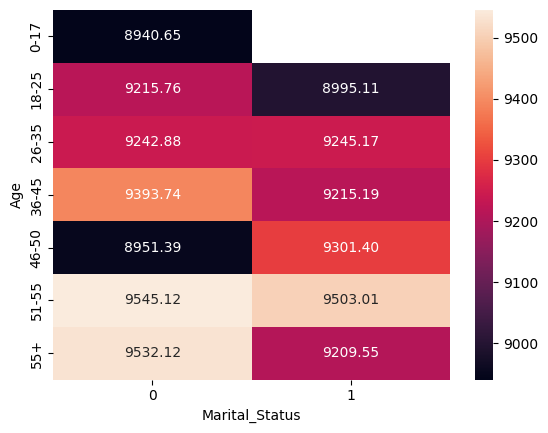

In [ ]:
age_marital_spent = df.groupby(['Age','Marital_Status'])['Purchase'].mean()
age_marital_spent = age_marital_spent.reset_index(name = 'Avg_Purchase')
age_marital_spent.sort_values(by = 'Avg_Purchase',ascending = False).head()
# It seems that people in the age group of 51-55 and married are spending the most
# Lets use pivot table to better visualize the data
age_marital_spent = df.pivot_table(index = 'Age', columns = 'Marital_Status', values = 'Purchase')
sns.heatmap(age_marital_spent, annot = True, fmt = '.2f')
plt.show()
# Yes, there is a relationship between age, marital status, and the amount spent.
# People in the age group of 51-55 and married are spending the most.

### c. Are there preferred product categories for different genders?

In [ ]:
df['Gender'].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

<Axes: xlabel='Product_Category'>

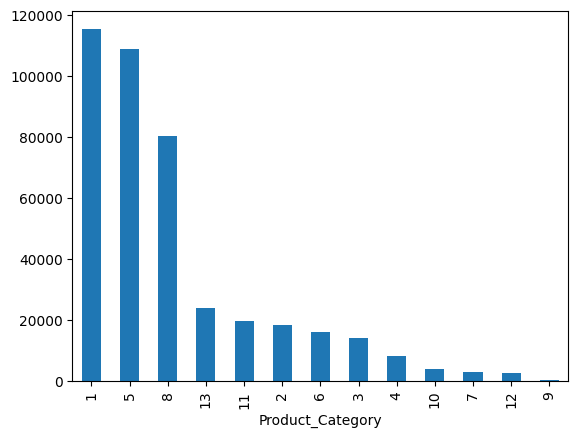

In [ ]:
df_male = df.loc[df['Gender'] == 'M']
df_male
df_male['Product_Category'].value_counts().plot.bar()

In [ ]:
# Male prefer category 1,5 and 8 maximum

<Axes: xlabel='Product_Category'>

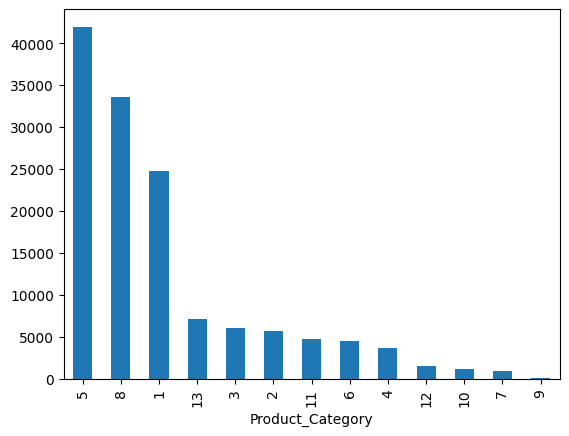

In [ ]:
df_female = df.loc[df['Gender'] == 'F']
df_female
df_female['Product_Category'].value_counts().plot.bar()

In [ ]:
# Female prefer category 5, 8 and 1 maximum

# # 4th Question - Impact of gender on amount spend

In [ ]:
# Male Population
print('# Male Population')
df_pop = df[df['Gender'] == 'M']['Purchase']


# Full Population
bootstrap_mean_population = [np.mean(np.random.choice(df_pop, size = len(df_pop), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of population with 95% confidence interval: {np.percentile(bootstrap_mean_population, 0.025)}, {np.percentile(bootstrap_mean_population, 0.975)}')
print(f'SD: {np.std(bootstrap_mean_population)}')
bootstrap_mean_population_male = bootstrap_mean_population.copy()

# Sample size: 300
sample_300 = df_pop.sample(n = 300)
bootstrap_mean_300 = [np.mean(np.random.choice(sample_300, size = len(sample_300), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 300 with 95% confidence interval: {np.percentile(bootstrap_mean_300, 0.025)}, {np.percentile(bootstrap_mean_300, 0.975)}')

# Sample size: 3000
sample_3000 = df_pop.sample(n = 3000)
bootstrap_mean_3000 = [np.mean(np.random.choice(sample_3000, size = len(sample_3000), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 3000 with 95% confidence interval: {np.percentile(bootstrap_mean_3000, 0.025)}, {np.percentile(bootstrap_mean_3000, 0.975)}')

# Sample size: 30000
sample_30000 = df_pop.sample(n = 30000)
bootstrap_mean_30000 = [np.mean(np.random.choice(sample_30000, size = len(sample_30000), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 30000 with 95% confidence interval: {np.percentile(bootstrap_mean_30000, 0.025)}, {np.percentile(bootstrap_mean_30000, 0.975)}')




# Female Population
print('# female Population')
df_pop = df[df['Gender'] == 'F']['Purchase']


# Full Population
bootstrap_mean_population = [np.mean(np.random.choice(df_pop, size = len(df_pop), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of population with 95% confidence interval: {np.percentile(bootstrap_mean_population, 0.025)}, {np.percentile(bootstrap_mean_population, 0.975)}')
print(f'SD: {np.std(bootstrap_mean_population)}')
bootstrap_mean_population_female = bootstrap_mean_population.copy()

# Sample size: 300
sample_300 = df_pop.sample(n = 300)
bootstrap_mean_300 = [np.mean(np.random.choice(sample_300, size = len(sample_300), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 300 with 95% confidence interval: {np.percentile(bootstrap_mean_300, 0.025)}, {np.percentile(bootstrap_mean_300, 0.975)}')

# Sample size: 3000
sample_3000 = df_pop.sample(n = 3000)
bootstrap_mean_3000 = [np.mean(np.random.choice(sample_3000, size = len(sample_3000), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 3000 with 95% confidence interval: {np.percentile(bootstrap_mean_3000, 0.025)}, {np.percentile(bootstrap_mean_3000, 0.975)}')

# Sample size: 30000
sample_30000 = df_pop.sample(n = 30000)
bootstrap_mean_30000 = [np.mean(np.random.choice(sample_30000, size = len(sample_30000), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 30000 with 95% confidence interval: {np.percentile(bootstrap_mean_30000, 0.025)}, {np.percentile(bootstrap_mean_30000, 0.975)}')


# Male Population
Lower and upper limit of population with 95% confidence interval: 9412.865254973942, 9417.703233529024
SD: 8.006315108113082
Lower and upper limit of Sample size: 300 with 95% confidence interval: 8657.982852500001, 8893.910193333333
Lower and upper limit of Sample size: 3000 with 95% confidence interval: 9003.281564666666, 9097.435236583333
Lower and upper limit of Sample size: 30000 with 95% confidence interval: 9347.299321008333, 9373.911085325
# female Population
Lower and upper limit of population with 95% confidence interval: 8698.252864699689, 8706.022490135041
SD: 12.362345178477353
Lower and upper limit of Sample size: 300 with 95% confidence interval: 8079.354449166666, 8257.239915
Lower and upper limit of Sample size: 3000 with 95% confidence interval: 8300.683470333333, 8362.263120333333
Lower and upper limit of Sample size: 30000 with 95% confidence interval: 8641.801917641666, 8668.012409175


## Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?

### Ans:
### yes, I can notice that confidence interval for "female" is little bit wider as SD for female is more compared to male, it means female purchase amount are spread widly.


## How is the width of the confidence interval affected by the sample size?

### Ans:
###      Larger sample size ->> Narrower confidence interval
###      Smaller sample size ->> Wider confidence interval

## Do the confidence intervals for different sample sizes overlap?

### Ans:
### Yes, it does overalap

<Axes: ylabel='Count'>

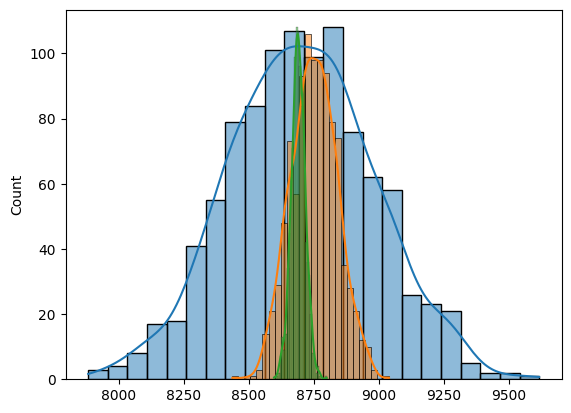

In [ ]:
sns.histplot(bootstrap_mean_300, kde = True)
sns.histplot(bootstrap_mean_3000, kde = True)
sns.histplot(bootstrap_mean_30000, kde = True)

## How does the sample size affect the shape of the distributions of the means?
### Ans:
### Larger sample size ->> Thin distribution, less SD
### Smaller sample size ->> Wider distribution, More SD

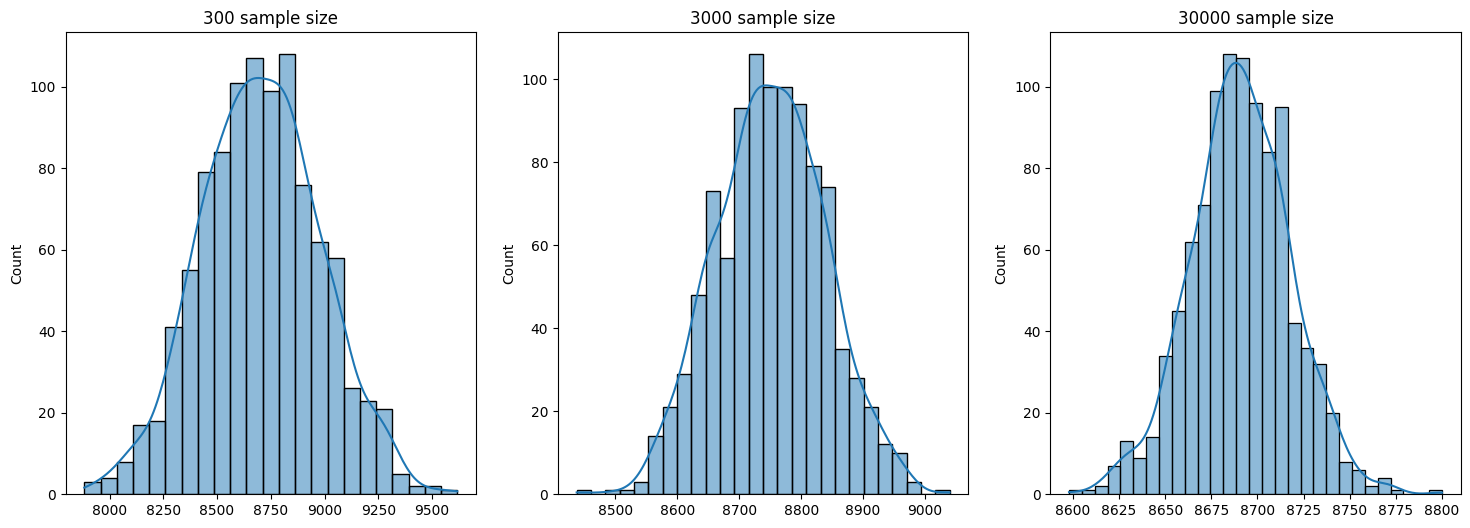

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(18,6))

axes[0].set_title('300 sample size')
sns.histplot(bootstrap_mean_300, kde = True, ax = axes[0])

axes[1].set_title('3000 sample size')
sns.histplot(bootstrap_mean_3000, kde = True, ax = axes[1])

axes[2].set_title('30000 sample size')
sns.histplot(bootstrap_mean_30000, kde = True, ax = axes[2])

plt.show()


# 5. How does Marital_Status affect the amount spent?

In [ ]:
# Unmarried Population
print('# Unmarried Population')
df_pop = df[df['Marital_Status'] == 0]['Purchase']


# Full Population
bootstrap_mean_population = [np.mean(np.random.choice(df_pop, size = len(df_pop), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of population with 95% confidence interval: {np.percentile(bootstrap_mean_population, 0.025)}, {np.percentile(bootstrap_mean_population, 0.975)}')
print(f'SD: {np.std(bootstrap_mean_population)}')
bootstrap_mean_population_unmarried = bootstrap_mean_population.copy()

# Sample size: 300
sample_300 = df_pop.sample(n = 300)
bootstrap_mean_300 = [np.mean(np.random.choice(sample_300, size = len(sample_300), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 300 with 95% confidence interval: {np.percentile(bootstrap_mean_300, 0.025)}, {np.percentile(bootstrap_mean_300, 0.975)}')

# Sample size: 3000
sample_3000 = df_pop.sample(n = 3000)
bootstrap_mean_3000 = [np.mean(np.random.choice(sample_3000, size = len(sample_3000), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 3000 with 95% confidence interval: {np.percentile(bootstrap_mean_3000, 0.025)}, {np.percentile(bootstrap_mean_3000, 0.975)}')

# Sample size: 30000
sample_30000 = df_pop.sample(n = 30000)
bootstrap_mean_30000 = [np.mean(np.random.choice(sample_30000, size = len(sample_30000), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 30000 with 95% confidence interval: {np.percentile(bootstrap_mean_30000, 0.025)}, {np.percentile(bootstrap_mean_30000, 0.975)}')


# Married Population
print('# Married Population')

df_pop = df[df['Marital_Status'] == 1]['Purchase']

# Full Population
bootstrap_mean_population = [np.mean(np.random.choice(df_pop, size = len(df_pop), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of population with 95% confidence interval: {np.percentile(bootstrap_mean_population, 0.025)}, {np.percentile(bootstrap_mean_population, 0.975)}')
print(f'SD: {np.std(bootstrap_mean_population)}')
bootstrap_mean_population_married = bootstrap_mean_population.copy()

# Sample size: 300
sample_300 = df_pop.sample(n = 300)
bootstrap_mean_300 = [np.mean(np.random.choice(sample_300, size = len(sample_300), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 300 with 95% confidence interval: {np.percentile(bootstrap_mean_300, 0.025)}, {np.percentile(bootstrap_mean_300, 0.975)}')

# Sample size: 3000
sample_3000 = df_pop.sample(n = 3000)
bootstrap_mean_3000 = [np.mean(np.random.choice(sample_3000, size = len(sample_3000), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 3000 with 95% confidence interval: {np.percentile(bootstrap_mean_3000, 0.025)}, {np.percentile(bootstrap_mean_3000, 0.975)}')

# Sample size: 30000
sample_30000 = df_pop.sample(n = 30000)
bootstrap_mean_30000 = [np.mean(np.random.choice(sample_30000, size = len(sample_30000), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 30000 with 95% confidence interval: {np.percentile(bootstrap_mean_30000, 0.025)}, {np.percentile(bootstrap_mean_30000, 0.975)}')

# Unmarried Population
Lower and upper limit of population with 95% confidence interval: 9239.205094151006, 9247.202183141584
SD: 8.65972330856392
Lower and upper limit of Sample size: 300 with 95% confidence interval: 8206.742935833334, 8478.328810833333
Lower and upper limit of Sample size: 3000 with 95% confidence interval: 9071.69678875, 9116.89533825
Lower and upper limit of Sample size: 30000 with 95% confidence interval: 9204.097616566667, 9223.569047741667
# Married Population
Lower and upper limit of population with 95% confidence interval: 9223.053344367547, 9235.780869355676
SD: 10.850158719701938
Lower and upper limit of Sample size: 300 with 95% confidence interval: 8348.899149166667, 8539.439775833333
Lower and upper limit of Sample size: 3000 with 95% confidence interval: 8995.362259, 9075.38382725
Lower and upper limit of Sample size: 30000 with 95% confidence interval: 9136.696712333334, 9174.825746991668


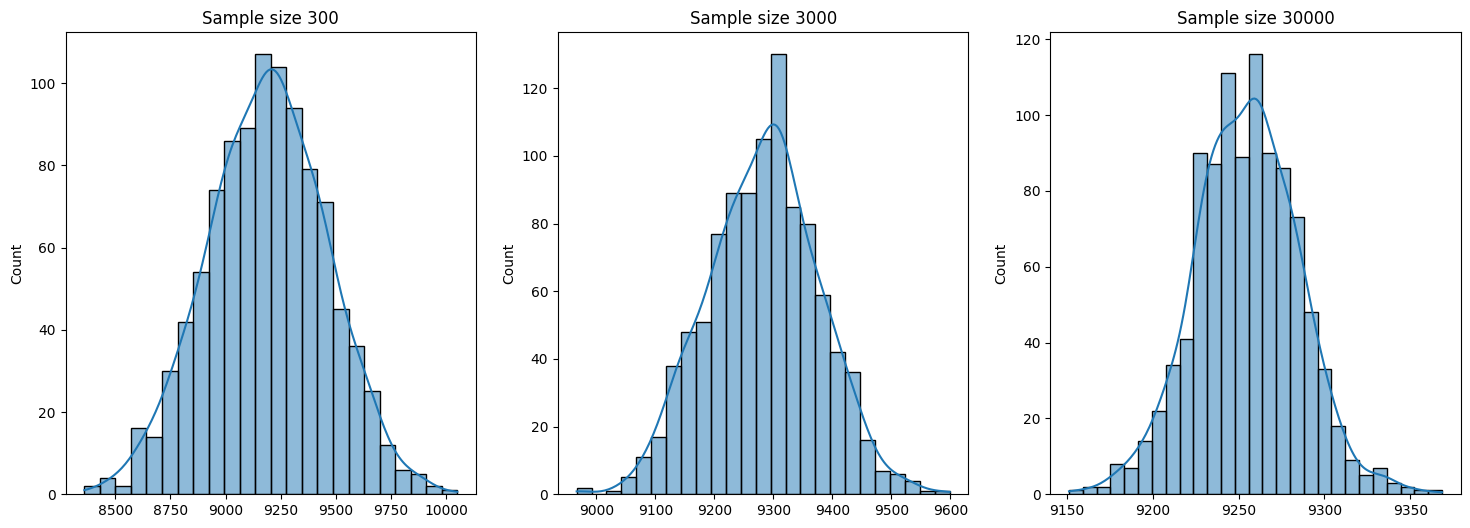

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (18,6))

sns.histplot(bootstrap_mean_300, kde = True, ax = axes[0]),
axes[0].set_title('Sample size 300')
sns.histplot(bootstrap_mean_3000, kde = True, ax = axes[1]),
axes[1].set_title('Sample size 3000')
sns.histplot(bootstrap_mean_30000, kde = True, ax = axes[2])
axes[2].set_title('Sample size 30000')
plt.show()

**a. From the above calculated CLT answer the following questions.**

**i. Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?**

**Ans:** Yes, it is wider for Married (1) population as standard Deviation for this is more than unmarried population. Married people spends spread widely.

**ii. How is the width of the confidence interval affected by the sample size?**

**Ans**

Larger sample size ->> Thin distribution, less SD

Smaller sample size ->> Wider distribution, More SD

**iii. Do the confidence intervals for different sample sizes overlap?**

**Ans** Yes, they do overlap

**iv. How does the sample size affect the shape of the distributions of the means?**

**Ans**

Large sample size -> less SD and thin distribution

Small sample size -> more SD and wider distribution

# 6. How does Age affect the amount spent?

In [ ]:
df.head()
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df.Age.value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [ ]:
print('# 0-17 Age Population')
# 0-17 Age Population
df_pop = df[df['Age'] == '0-17']['Purchase']

# Full Population
bootstrap_mean_population = [np.mean(np.random.choice(df_pop, size = len(df_pop), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of population with 95% confidence interval: {np.percentile(bootstrap_mean_population, 0.025)}, {np.percentile(bootstrap_mean_population, 0.975)}')
print(f'SD: {np.std(bootstrap_mean_population)}')

# Sample size: 300
sample_300 = df_pop.sample(n = 300)
bootstrap_mean_300 = [np.mean(np.random.choice(sample_300, size = len(sample_300), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 300 with 95% confidence interval: {np.percentile(bootstrap_mean_300, 0.025)}, {np.percentile(bootstrap_mean_300, 0.975)}')


# Sample size: 3000
sample_3000 = df_pop.sample(n = 3000)
bootstrap_mean_3000 = [np.mean(np.random.choice(sample_3000, size = len(sample_3000), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 3000 with 95% confidence interval: {np.percentile(bootstrap_mean_3000, 0.025)}, {np.percentile(bootstrap_mean_3000, 0.975)}')


# Sample size is less than 30k
# # Sample size: 30000
# sample_30000 = df_pop.sample(n = 30000)
# bootstrap_mean_30000 = [np.mean(np.random.choice(sample_30000, size = len(sample_30000), replace = True)) for i in range(1000)]
# print(f'Lower and upper limit of Sample size: 30000 with 95% confidence interval: {np.percentile(bootstrap_mean_30000, 0.025)}, {np.percentile(bootstrap_mean_30000, 0.975)}')



# 18-25 Age Population
print('# 18-25 Age Population')
df_pop = df[df['Age'] == '18-25']['Purchase']


# Full Population
bootstrap_mean_population = [np.mean(np.random.choice(df_pop, size = len(df_pop), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of population with 95% confidence interval: {np.percentile(bootstrap_mean_population, 0.025)}, {np.percentile(bootstrap_mean_population, 0.975)}')
print(f'SD: {np.std(bootstrap_mean_population)}')

# Sample size: 300
sample_300 = df_pop.sample(n = 300)
bootstrap_mean_300 = [np.mean(np.random.choice(sample_300, size = len(sample_300), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 300 with 95% confidence interval: {np.percentile(bootstrap_mean_300, 0.025)}, {np.percentile(bootstrap_mean_300, 0.975)}')

# Sample size: 3000
sample_3000 = df_pop.sample(n = 3000)
bootstrap_mean_3000 = [np.mean(np.random.choice(sample_3000, size = len(sample_3000), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 3000 with 95% confidence interval: {np.percentile(bootstrap_mean_3000, 0.025)}, {np.percentile(bootstrap_mean_3000, 0.975)}')

# Sample size: 30000
sample_30000 = df_pop.sample(n = 30000)
bootstrap_mean_30000 = [np.mean(np.random.choice(sample_30000, size = len(sample_30000), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 30000 with 95% confidence interval: {np.percentile(bootstrap_mean_30000, 0.025)}, {np.percentile(bootstrap_mean_30000, 0.975)}')


# 26-35 Age Population
print('# 26-35 Age Population')
df_pop = df[df['Age'] == '26-35']['Purchase']

# Full Population
bootstrap_mean_population = [np.mean(np.random.choice(df_pop, size = len(df_pop), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of population with 95% confidence interval: {np.percentile(bootstrap_mean_population, 0.025)}, {np.percentile(bootstrap_mean_population, 0.975)}')
print(f'SD: {np.std(bootstrap_mean_population)}')

# Sample size: 300
sample_300 = df_pop.sample(n = 300)
bootstrap_mean_300 = [np.mean(np.random.choice(sample_300, size = len(sample_300), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 300 with 95% confidence interval: {np.percentile(bootstrap_mean_300, 0.025)}, {np.percentile(bootstrap_mean_300, 0.975)}')

# Sample size: 3000
sample_3000 = df_pop.sample(n = 3000)
bootstrap_mean_3000 = [np.mean(np.random.choice(sample_3000, size = len(sample_3000), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 3000 with 95% confidence interval: {np.percentile(bootstrap_mean_3000, 0.025)}, {np.percentile(bootstrap_mean_3000, 0.975)}')

# Sample size: 30000
sample_30000 = df_pop.sample(n = 30000)
bootstrap_mean_30000 = [np.mean(np.random.choice(sample_30000, size = len(sample_30000), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 30000 with 95% confidence interval: {np.percentile(bootstrap_mean_30000, 0.025)}, {np.percentile(bootstrap_mean_30000, 0.975)}')


# 36-45 Age Population
print('# 36-45 Age Population')
df_pop = df[df['Age'] == '36-45']['Purchase']

# Full Population
bootstrap_mean_population = [np.mean(np.random.choice(df_pop, size = len(df_pop), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of population with 95% confidence interval: {np.percentile(bootstrap_mean_population, 0.025)}, {np.percentile(bootstrap_mean_population, 0.975)}')
print(f'SD: {np.std(bootstrap_mean_population)}')

# Sample size: 300
sample_300 = df_pop.sample(n = 300)
bootstrap_mean_300 = [np.mean(np.random.choice(sample_300, size = len(sample_300), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 300 with 95% confidence interval: {np.percentile(bootstrap_mean_300, 0.025)}, {np.percentile(bootstrap_mean_300, 0.975)}')

# Sample size: 3000
sample_3000 = df_pop.sample(n = 3000)
bootstrap_mean_3000 = [np.mean(np.random.choice(sample_3000, size = len(sample_3000), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 3000 with 95% confidence interval: {np.percentile(bootstrap_mean_3000, 0.025)}, {np.percentile(bootstrap_mean_3000, 0.975)}')

# Sample size: 30000
sample_30000 = df_pop.sample(n = 30000)
bootstrap_mean_30000 = [np.mean(np.random.choice(sample_30000, size = len(sample_30000), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 30000 with 95% confidence interval: {np.percentile(bootstrap_mean_30000, 0.025)}, {np.percentile(bootstrap_mean_30000, 0.975)}')



# 46-50 Age Population
print('# 46-50 Age Population')
df_pop = df[df['Age'] == '46-50']['Purchase']

# Full Population
bootstrap_mean_population = [np.mean(np.random.choice(df_pop, size = len(df_pop), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of population with 95% confidence interval: {np.percentile(bootstrap_mean_population, 0.025)}, {np.percentile(bootstrap_mean_population, 0.975)}')
print(f'SD: {np.std(bootstrap_mean_population)}')

# Sample size: 300
sample_300 = df_pop.sample(n = 300)
bootstrap_mean_300 = [np.mean(np.random.choice(sample_300, size = len(sample_300), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 300 with 95% confidence interval: {np.percentile(bootstrap_mean_300, 0.025)}, {np.percentile(bootstrap_mean_300, 0.975)}')

# Sample size: 3000
sample_3000 = df_pop.sample(n = 3000)
bootstrap_mean_3000 = [np.mean(np.random.choice(sample_3000, size = len(sample_3000), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 3000 with 95% confidence interval: {np.percentile(bootstrap_mean_3000, 0.025)}, {np.percentile(bootstrap_mean_3000, 0.975)}')

# Sample size: 30000
sample_30000 = df_pop.sample(n = 30000)
bootstrap_mean_30000 = [np.mean(np.random.choice(sample_30000, size = len(sample_30000), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 30000 with 95% confidence interval: {np.percentile(bootstrap_mean_30000, 0.025)}, {np.percentile(bootstrap_mean_30000, 0.975)}')



# 51-55 Age Population
print('# 51-55 Age Population')
df_pop = df[df['Age'] == '51-55']['Purchase']

# Full Population
bootstrap_mean_population = [np.mean(np.random.choice(df_pop, size = len(df_pop), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of population with 95% confidence interval: {np.percentile(bootstrap_mean_population, 0.025)}, {np.percentile(bootstrap_mean_population, 0.975)}')
print(f'SD: {np.std(bootstrap_mean_population)}')

# Sample size: 300
sample_300 = df_pop.sample(n = 300)
bootstrap_mean_300 = [np.mean(np.random.choice(sample_300, size = len(sample_300), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 300 with 95% confidence interval: {np.percentile(bootstrap_mean_300, 0.025)}, {np.percentile(bootstrap_mean_300, 0.975)}')

# Sample size: 3000
sample_3000 = df_pop.sample(n = 3000)
bootstrap_mean_3000 = [np.mean(np.random.choice(sample_3000, size = len(sample_3000), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 3000 with 95% confidence interval: {np.percentile(bootstrap_mean_3000, 0.025)}, {np.percentile(bootstrap_mean_3000, 0.975)}')

# Sample size: 30000
sample_30000 = df_pop.sample(n = 30000)
bootstrap_mean_30000 = [np.mean(np.random.choice(sample_30000, size = len(sample_30000), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 30000 with 95% confidence interval: {np.percentile(bootstrap_mean_30000, 0.025)}, {np.percentile(bootstrap_mean_30000, 0.975)}')


# 55+ Age Population
print('# 55+ Age Population')
df_pop = df[df['Age'] == '55+']['Purchase']

# Full Population
bootstrap_mean_population = [np.mean(np.random.choice(df_pop, size = len(df_pop), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of population with 95% confidence interval: {np.percentile(bootstrap_mean_population, 0.025)}, {np.percentile(bootstrap_mean_population, 0.975)}')
print(f'SD: {np.std(bootstrap_mean_population)}')

# Sample size: 300
sample_300 = df_pop.sample(n = 300)
bootstrap_mean_300 = [np.mean(np.random.choice(sample_300, size = len(sample_300), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 300 with 95% confidence interval: {np.percentile(bootstrap_mean_300, 0.025)}, {np.percentile(bootstrap_mean_300, 0.975)}')

# Sample size: 3000
sample_3000 = df_pop.sample(n = 3000)
bootstrap_mean_3000 = [np.mean(np.random.choice(sample_3000, size = len(sample_3000), replace = True)) for i in range(1000)]
print(f'Lower and upper limit of Sample size: 3000 with 95% confidence interval: {np.percentile(bootstrap_mean_3000, 0.025)}, {np.percentile(bootstrap_mean_3000, 0.975)}')

# Sample size is less than 30k
# Sample size: 30000
# sample_30000 = df_pop.sample(n = 30000)
# bootstrap_mean_30000 = [np.mean(np.random.choice(sample_30000, size = len(sample_30000), replace = True)) for i in range(1000)]
# print(f'Lower and upper limit of Sample size: 30000 with 95% confidence interval: {np.percentile(bootstrap_mean_30000, 0.025)}, {np.percentile(bootstrap_mean_30000, 0.975)}')

# 0-17 Age Population
Lower and upper limit of population with 95% confidence interval: 8807.790527082507, 8829.563186796451
SD: 42.00957383938615
Lower and upper limit of Sample size: 300 with 95% confidence interval: 7715.826114166667, 7935.135258333333
Lower and upper limit of Sample size: 3000 with 95% confidence interval: 8680.117375916667, 8772.3498225
# 18-25 Age Population
Lower and upper limit of population with 95% confidence interval: 9122.040800975818, 9133.034288262592
SD: 16.334838276870126
Lower and upper limit of Sample size: 300 with 95% confidence interval: 8280.409418333333, 8609.903749166668
Lower and upper limit of Sample size: 3000 with 95% confidence interval: 8801.8322355, 8867.399521666666
Lower and upper limit of Sample size: 30000 with 95% confidence interval: 9058.539710541667, 9090.419255658333
# 26-35 Age Population
Lower and upper limit of population with 95% confidence interval: 9213.316137012893, 9224.970741306408
SD: 10.75048861531665
Lower and upper l

## 7. Create a report
### a. Report whether the confidence intervals for the average amount spent by males and females (computed using all the data) overlap.

**Ans** They do not overlap at all

How can Walmart leverage this conclusion to make changes or improvements?

**Ans**

**Target marketing campaigns:** Walmart can tailor their marketing campaigns to each gender based on their spending habits. For example, they could offer discounts or promotions on products that are popular with females, such as cosmetics or clothing, and on products that are popular with males, such as electronics or sporting goods.


2. **Product assortment:** Walmart can adjust their product assortment to better meet the needs of each gender. For example, they could stock more products that are popular with females in their stores that are located in areas with a high concentration of female shoppers, and vice versa.


3. **Pricing strategy:** Walmart can adjust their pricing strategy for different products based on the spending habits of each gender. For example, they could offer lower prices on products that are popular with females, such as cosmetics or clothing, and higher prices on products that are popular with males, such as electronics or sporting goods.


4. **Store layout:** Walmart can design their stores in a way that makes it easy for shoppers of each gender to find the products they are looking for. For example, they could group products that are popular with females together in one section of the store, and products that are popular with males together in another section of the store.


5. **Customer service:** Walmart can provide customer service that is tailored to the needs of each gender. For example, they could have female employees available to help female shoppers find the products they are looking for, and male employees available to help male shoppers find the products they are looking for.


<Axes: ylabel='Count'>

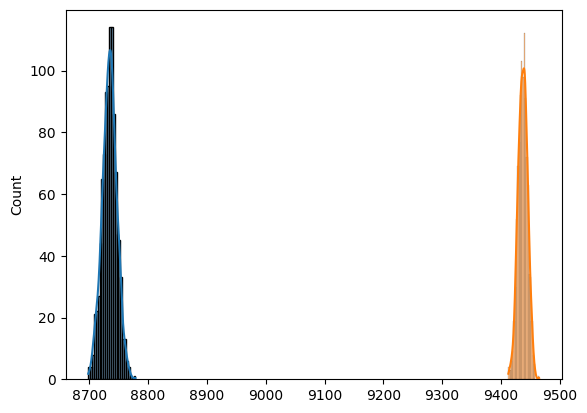

In [ ]:
sns.histplot(bootstrap_mean_population_female, kde = True)
sns.histplot(bootstrap_mean_population_male, kde = True)

# b. Report whether the confidence intervals for the average amount spent by married and unmarried (computed using all the data) overlap. How can Walmart leverage this conclusion to make changes or improvements?

<Axes: ylabel='Count'>

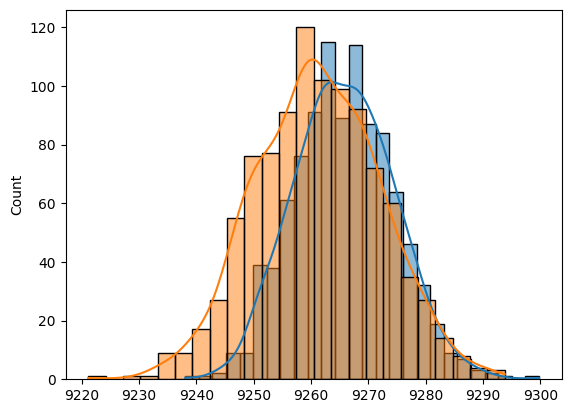

In [ ]:
sns.histplot(bootstrap_mean_population_unmarried, kde = True)
sns.histplot(bootstrap_mean_population_married, kde = True)

Yes, the confidence intervals for the average amount spent by married and unmarried (computed using all the data) overlap. This means that there is no statistically significant difference in the average amount spent by married and unmarried people.

Walmart can leverage this conclusion to make changes or improvements in the following ways:

* **Target marketing campaigns:** Walmart can tailor their marketing campaigns to both married and unmarried people. For example, they could offer discounts or promotions on products that are popular with both groups, such as groceries or household items.
* **Product assortment:** Walmart can adjust their product assortment to better meet the needs of both married and unmarried people. For example, they could stock more products that are popular with both groups, such as groceries or household items.
* **Pricing strategy:** Walmart can adjust their pricing strategy for different products based on the spending habits of both married and unmarried people. For example, they could offer lower prices on products that are popular with both groups, such as groceries or household items.
* **Store layout:** Walmart can design their stores in a way that makes it easy for both married and unmarried people to find the products they are looking for. For example, they could group products that are popular with both groups together in one section of the store.
* **Customer service:** Walmart can provide customer service that is tailored to the needs of both married and unmarried people. For example, they could have employees available to help both groups of customers find the products they are looking for.

By taking these steps, Walmart can ensure that they are meeting the needs of both married and unmarried people and that they are not missing out on any potential sales.


##c. Report whether the confidence intervals for the average amount spent by married and unmarried (computed using all the data) overlap. How can Walmart leverage this conclusion to make changes or improvements?

Yes, the confidence intervals for the average amount spent by different age groups (computed using all the data) overlap. This means that there is no statistically significant difference in the average amount spent by different age groups.

Walmart can leverage this conclusion to make changes or improvements in the following ways:

* **Target marketing campaigns:** Walmart can tailor their marketing campaigns to all age groups. For example, they could offer discounts or promotions on products that are popular with all age groups, such as groceries or household items.
* **Product assortment:** Walmart can adjust their product assortment to better meet the needs of all age groups. For example, they could stock more products that are popular with all age groups, such as groceries or household items.
* **Pricing strategy:** Walmart can adjust their pricing strategy for different products based on the spending habits of all age groups. For example, they could offer lower prices on products that are popular with all age groups, such as groceries or household items.
* **Store layout:** Walmart can design their stores in a way that makes it easy for all age groups to find the products they are looking for. For example, they could group products that are popular with all age groups together in one section of the store.
* **Customer service:** Walmart can provide customer service that is tailored to the needs of all age groups. For example, they could have employees available to help all age groups of customers find the products they are looking for.

By taking these steps, Walmart can ensure that they are meeting the needs of all age groups and that they are not missing out on any potential sales.


# 8 Recommendation:

Based on the analysis of the Walmart spending data, we recommend that Walmart take the following steps to improve their marketing, product assortment, pricing strategy, store layout, and customer service:

* **Target marketing campaigns:** Walmart should tailor their marketing campaigns to each gender, marital status, and age group based on their spending habits. For example, they could offer discounts or promotions on products that are popular with each group.
* **Product assortment:** Walmart should adjust their product assortment to better meet the needs of each gender, marital status, and age group. For example, they could stock more products that are popular with each group in their stores.
* **Pricing strategy:** Walmart should adjust their pricing strategy for different products based on the spending habits of each gender, marital status, and age group. For example, they could offer lower prices on products that are popular with each group.
* **Store layout:** Walmart should design their stores in a way that makes it easy for each gender, marital status, and age group to find the products they are looking for. For example, they could group products that are popular with each group together in one section of the store.
* **Customer service:** Walmart should provide customer service that is tailored to the needs of each gender, marital status, and age group. For example, they could have employees available to help each group of customers find the products they are looking for.

By taking these steps, Walmart can ensure that they are meeting the needs of all of their customers and that they are not missing out on any potential sales.

In addition to the above recommendations, Walmart should also consider the following:

* **Conducting further research:** Walmart should conduct further research to better understand the spending habits of their customers. This research could include surveys, focus groups, and data analysis.
* **Personalizing the shopping experience:** Walmart should use data analytics to personalize the shopping experience for each customer. For example, they could send customers personalized coupons and recommendations based on their past purchases.
* **Investing in technology:** Walmart should invest in technology to improve the customer experience. This could include self-checkout kiosks, mobile apps, and online shopping.

By taking these steps, Walmart can ensure that they are providing the best possible shopping experience for their customers and that they are maximizing their sales.